In [210]:
import pandas as pd
from pandas import Series,DataFrame

In [211]:
titanic_df = pd.read_csv('train.csv')

In [212]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [213]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [214]:
# what do we want to achieve?
# who are the passengers? ages, class, etc.
# what factors helped someone survive?
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

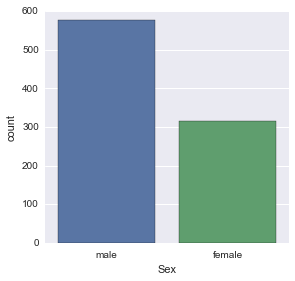

In [215]:
# gender?
# much more males
sns.factorplot('Sex',data=titanic_df,kind='count')

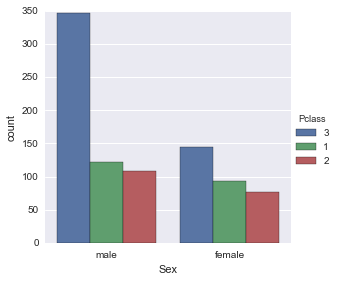

In [216]:
# seperate gender by classes
# much more males in third class
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

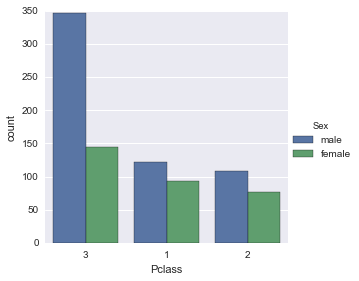

In [217]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

In [218]:
# apply technique to pass a method
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [219]:
# lecture 44 for how to apply
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [220]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


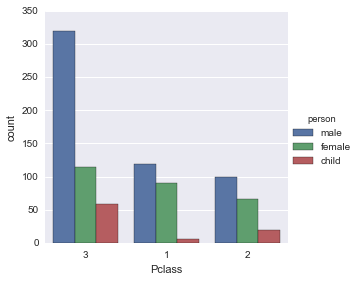

In [221]:
# we can see that it worked. passenger 10 is now a child
# we can see that there are quite a few children in 3rd class
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

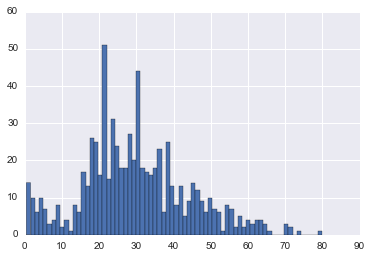

In [222]:
# see age dist is middle heavy
titanic_df['Age'].hist(bins=70)

In [223]:
# just under 30
titanic_df['Age'].mean()

29.69911764705882

In [224]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

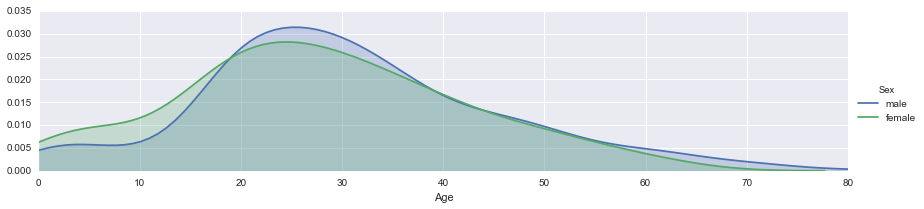

In [225]:
# facet grid for multiple kde plot
# create facet grid
fig = sns.FacetGrid(titanic_df,hue="Sex",aspect=4)
# map kde plot from age columns
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

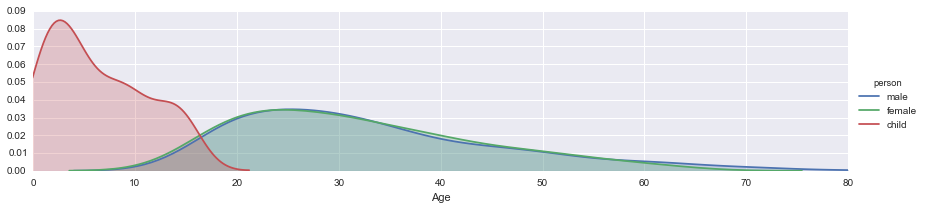

In [226]:
# Add children
fig = sns.FacetGrid(titanic_df,hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

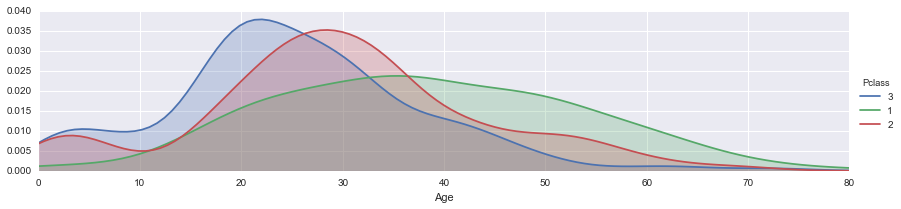

In [227]:
# Class normal distro for age, but not lower classes
fig = sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [228]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [229]:
# we need to drop null values
deck = titanic_df['Cabin'].dropna()

In [230]:
# cabin deck and cabin number
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

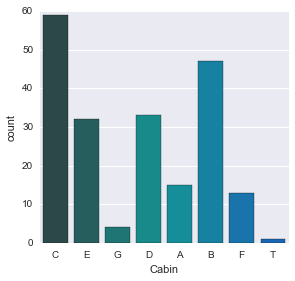

In [231]:
# we only need the letter
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df, kind='count', palette='winter_d')
# to look at palette rthemes

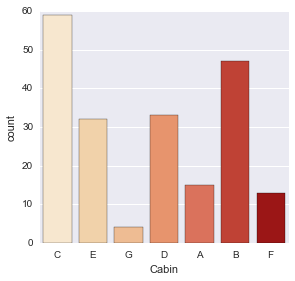

In [232]:
# there is a T cabin, which makes no sense. lets get rif of it
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df, kind='count', palette='OrRd')

In [233]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


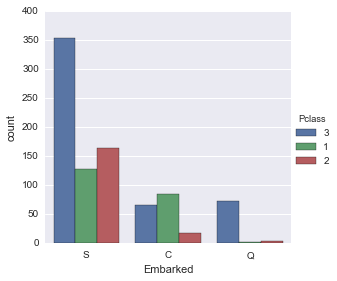

In [234]:
# Embarked is based on the town that people came from
# lets make a factor plot
# where people came aboard , does it affect their class?
sns.factorplot("Embarked",data=titanic_df,kind='count',hue='Pclass')

In [235]:
# who was alone and who was with family
# SibSP is siblings, Parch is parents or children on board.
# If both zero they were alone
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [236]:
titanic_df['Alone'] = titanic_df.Alone.map(lambda x : 'With Family' if x > 0 else 'Alone')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


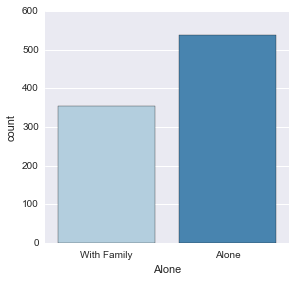

In [237]:
# a bit more people were alone
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues')

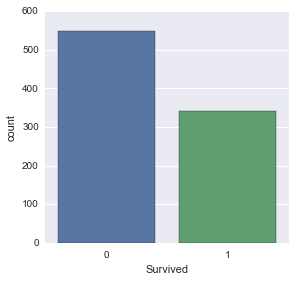

In [238]:
# what factors helped someone survive the disaster
#titanic_df['Survived'] = titanic_df.Survived.map({0:'No',1:'Yes'})
# more of the passengers died
sns.factorplot('Survived', data=titanic_df, kind='count')

In [239]:
# Let's use a factor plot again, but now considering class
titanic_df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

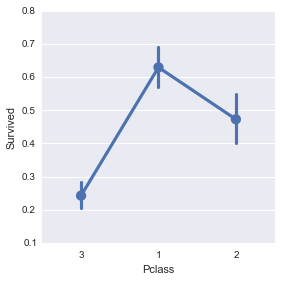

In [240]:
sns.factorplot('Pclass','Survived',data=titanic_df)

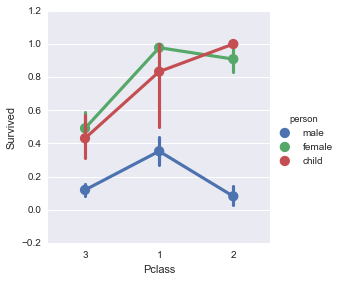

In [241]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

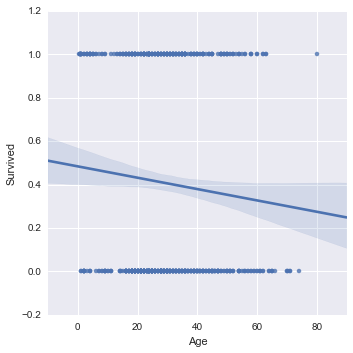

In [242]:
# does age affect you survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

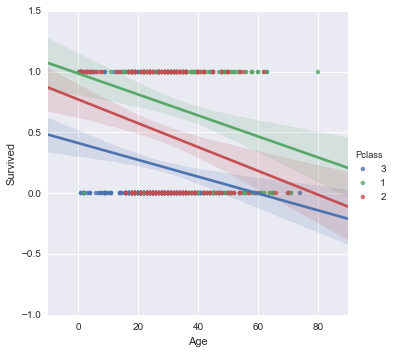

In [243]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)
# muchl less deaths in the first class

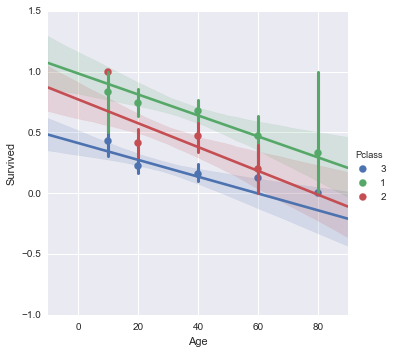

In [244]:
generation = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generation)

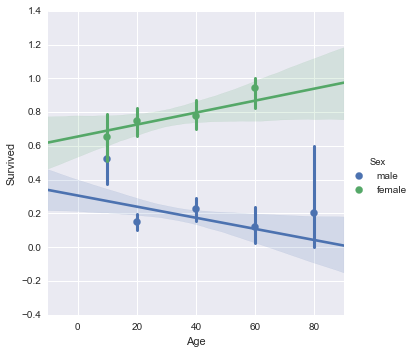

In [245]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generation)

In [ ]:
# 1 did deck affect survival - was sex also issue on deck
# 2 does being with your family affect survival

In [248]:
titanic_df['Alone'].head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

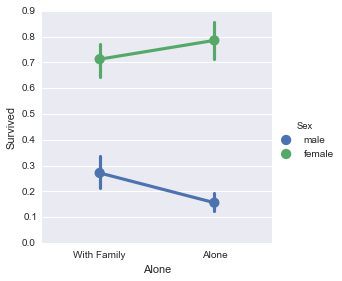

In [249]:
# better to be a woman alone that man,
sns.factorplot('Alone','Survived',hue='Sex',data=titanic_df,x_bins=generation)

In [ ]:
sns.factorplot('Alone','Survived',hue='Sex',data=titanic_df,x_bins=generation)